<a href="https://colab.research.google.com/github/Elma-dev/Optimizaion/blob/main/Optimization__Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<center>**Import Library**</center>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools as itr
import warnings
warnings.filterwarnings("ignore")
import random as rd
import math as mt
import functions as fc
import time


#<center>**Variable neighborhood search**</center>

In [3]:
def VNS(sol,f,Kmax):
  x=np.random.choice(sol)
  k=1
  #
  plot(x,sol)
  while k<=Kmax:
    y=SolKNeighbour(x,k);
    if f(x)>f(y):
      k=1
      x=y
      plot(x,sol)
    else:
      k+=1
  return x
def f(x):
  return (x**4)-2*(x**3)+2


  

In [4]:
def SolKNeighbour(x,k):
  return  np.random.choice(np.linspace(x,x+1,k))

In [5]:
def plot(x,sol):
  plt.plot(sol,f(sol),c="blue")
  plt.fill_between(sol, f(sol), 0,where = (sol > x-1) & (sol <=x),color = 'g',label="K-Neighbour")
  plt.scatter(x,f(x),c="red",s=200,label="VNS(f(x))")
  plt.title("Variable neighborhood search",fontsize=16)
  plt.xlabel("x",fontsize=16)
  plt.ylabel("f(x)=x^4-2x^3+2",fontsize=16)
  plt.legend()
  plt.show()

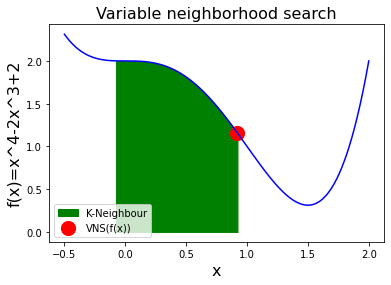

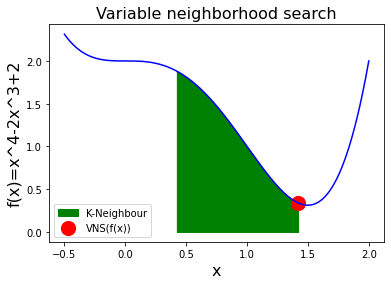

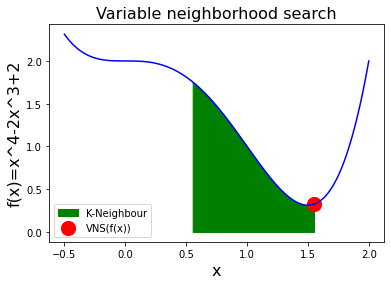

1.551856204030117

In [6]:

x=np.linspace(-0.5,2,1000)
y=f(x)
VNS(x,f,800)

#<center>**DESCENT**</center>

# Nouvelle section

In [10]:
def plot2(x,sol,iter):
  plt.plot(sol,f(sol),c="blue")
  plt.scatter(x,f(x),c="r",s=100,label="min(f(x1),f(x2))")
  plt.title(f"after iteration {iter}",fontsize=16)
  plt.xlabel("x",fontsize=16)
  plt.ylabel("f(x)=x^4-2x^3+2",fontsize=16)
  plt.legend()
  plt.show()

In [11]:
def somePoint(x):
  return np.random.choice(x)

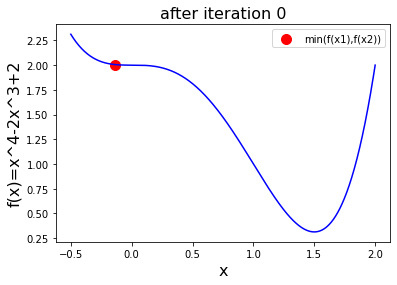

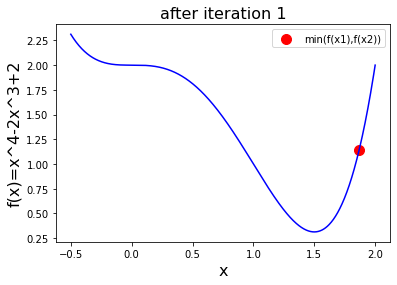

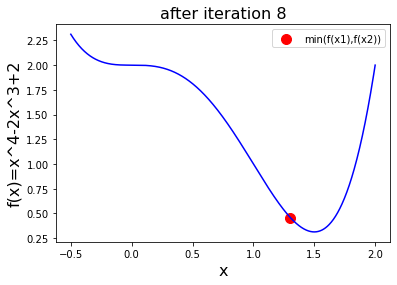

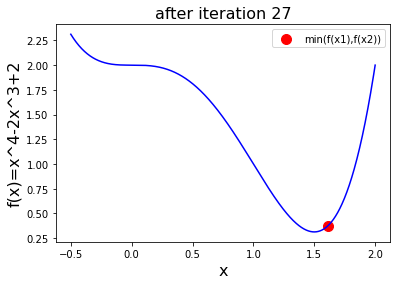

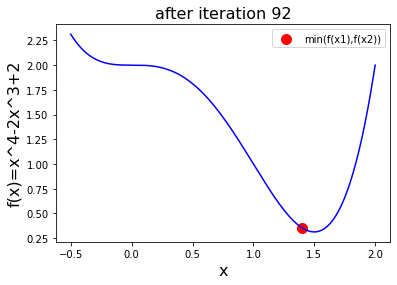

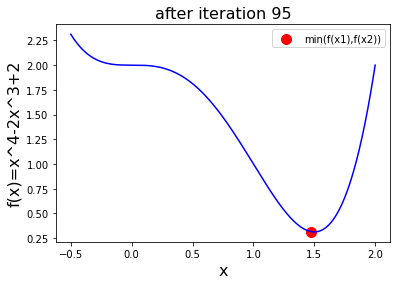

In [12]:

def descent(x,f,maxIter=100):
  x1=x[0]
  i=0
  while i<maxIter:
    x2=somePoint(x)
    if  f(x1)>f(x2):
      x1=x2
      plot2(x1,x,i)
    i+=1
#------------Test-----------
x=np.linspace(-0.5,2,1000)
descent(x,f)
  

#<center>**Simulated Annealing**</center>

In [13]:
def Simulated_Annealing(*,x=2,y=1,T0=1000,M=300,N=15,alpha=0.85,k=0.1) :
    
    start_time = time.time() # start time (timing purposes)

    temp = []     # to plot the temprature
    obj_val = []  # to plot the obj val reached at the end of each m (small M)
    
    for i in range(M): # how many times to decrease the temp.
        for j in range(N): # for each m, how many neighborhood searche
            
            x_temporary,y_temporary=fc.improve(x,y,k)

            x,y,f=fc.update(x,y,x_temporary,y_temporary,T0)
            
        temp.append(T0)
        obj_val.append(f)

        T0 = alpha*T0
        
    print("Execution Time in Seconds:",time.time() - start_time) # exec. time
            
    return (x,y,obj_val,temp)

#<center>**Tabu**</ceneter>

In [14]:
def Tabu(distance,flow,x,*,M=60,L=10):
    
    start_time = time.time() # start time (timing purposes)
    
    Tabu_List = np.empty((0,len(x)+1))
    One_Final_Guy_Final = []
    Save_Solutions_Here = np.empty((0,len(x)+1))
    Iterations = 1
    
    for i in range(M):

        All_N_for_i = fc.creat_neighbours(x)
        OF_Values_all_N=fc.neighbours_cost(x,distance,flow,All_N_for_i)

        # Ordered OF of neighborhood, sorted by OF value
        OF_Values_all_N_Ordered = np.array(sorted(OF_Values_all_N,key=lambda y: y[0]))

        # Check if solution is already in Tabu list, if yes, choose the next one
        Current_Sol,Tabu_List=fc.best_solution(OF_Values_all_N_Ordered,Tabu_List,L)
        
        Save_Solutions_Here = np.vstack((Current_Sol,Save_Solutions_Here)) # Save solutions, which is the best in each run

        # In order to "kick-start" the search when stuck in a local optimum, for diversification
        L,x,Iterations=fc.dynamic_list(x,Current_Sol,Iterations,L)

    One_Final_Guy_Final = fc.final_soluction(Save_Solutions_Here)[np.newaxis]
    
    print("Execution Time in Seconds:",time.time() - start_time) # exec. time
    
    return One_Final_Guy_Final[0]

#<center>**Genitic**</center>

In [15]:
def Genetic(x_y_string,*,M=80,N=120,pc=1,pm=0.3):
    
    start_time = time.time() # start time (timing purposes)

    # create an empty array to store a solution from each generation
    best_of_a_generation = np.empty((0,len(x_y_string)+1))

    # so now, pool_of_solutions, has n (population) chromosomes
    pool_of_solutions = fc.initialisez(x_y_string,N)

    for i in range(M): # do it n (generation) times

        new_population,new_population_with_obj_val=fc.create_population(x_y_string,N,pool_of_solutions,pc,pm)

        # we replace the initial (before) population with the new one (current generation)
        pool_of_solutions = new_population

        # for each generation we want to find the best solution in that generation
        sorted_best_for_plotting = np.array(sorted(new_population_with_obj_val,key=lambda x:x[0]))

        # since we sorted them from best to worst the best in that generation would be the first solution in the array
        best_of_a_generation = np.vstack((best_of_a_generation,sorted_best_for_plotting[0]))      
    
    # for this array of last population (convergence), there is a best solution so we sort them from best to worst
    sorted_last_population = np.array(sorted(new_population_with_obj_val,key=lambda x:x[0]))
    sorted_best_of_a_generation = np.array(sorted(best_of_a_generation,key=lambda x:x[0]))
    
    print("Execution Time in Seconds:",time.time() - start_time) # exec. time
    
    return (sorted_last_population,sorted_best_of_a_generation,best_of_a_generation,sorted_best_of_a_generation)